# **Tutorial de Criação de App: Chat**
---

Pré-requisitos da aula

- Funções
- Import
- Orientação a Objetos
- Interface Gráfica
- Introdução ao Flet
- Meu primeiro Flet App
- Eventos
- Light e Dark Mode

---

Finalmente chegamos à fase em que iremos desenvolver nossos apps completos para você poder publicar à vontade e mostrar para os amigos com um aplicativo para chamar de seu. Nosso primeiro app do curso será um **Chat Online**, para você mesmo poder fazer concorrência ao WhatsApp e ao Telegram...rsrs.

Exageros à parte, vamos começar:

### Começando a criar o app

1. Nosso app será construído com Flet. Portanto vamos começar criando o nosso projeto. Capriche no nome. Para o projeto desse tutorial, vamos simplesmente chamá-lo de **chat**. Não se esqueça do procedimento padrão de criar um ambiente virtual `.venv`, instalar o flet com `pip install flet` e criar um projeto flet com `flet create .` na pasta do seu projeto.
2. Confira o código-fonte padrão do projeto dentro do arquivo `main.py`:

In [ ]:
import flet as ft


def main(page: ft.Page):
    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

3. Acrescente as propriedades que desejar antes de começarmos a desenvolver, de fato, o nosso programa:

In [ ]:
import flet as ft


def main(page: ft.Page):
    # propriedades da página
    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

### AppBar

4. Vamos começar com o **AppBar**. O AppBar é uma barra superior da nossa aplicação que será inserida antes de `page.add()`:

In [ ]:
import flet as ft


def main(page: ft.Page):
    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar()

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

5. Isso já é o suficiente para gerar um AppBar, embora sem conteúdo. Veja:

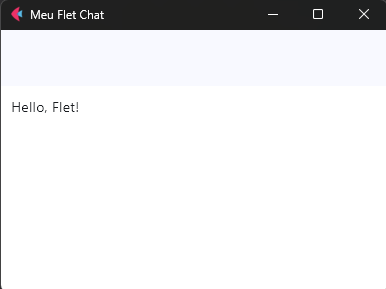

6. Vamos começar colocando um título para o nosso AppBar:

In [ ]:
import flet as ft


def main(page: ft.Page):
    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16))

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

7. Aproveitaremos que criamos na aula passada um algoritmo para alternar os temas Light e Dark. Vamos implementar esse código dentro do AppBar, com uma alteração: iremos trocar o texto "**Light theme**" e "**Dark theme**" do app da aula anterior por ícones representando os temas. Para isso, iremos criar uma variável representando o ícone do tema padrão da aplicação (que é o tema claro).
8. Depois, iremos programar uma condicional para essa variável para que o ícone mude quando o *switch button* for acionado.
9. Enfim, chamaremos essa variável desta vez dentro do **AppBar** ao invés do SafeBar, acrescentando ao final de `ft.AppBar()` o parâmetro `actions=[tema, interruptor]`, onde `tema` representa o ícone do tema, e `interruptor` representa o *switch button*:

In [ ]:
import flet as ft


def main(page: ft.Page):
    # função do tema
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        # altera o ícone do tema
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # ícone e botão do tema
    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16), actions=[tema, interruptor])

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)